# CLASSIFICATION USING IRIS DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
iris=pd.read_excel('iris.xls')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
iris['SL'].fillna(round(iris['SL'].median(),1),inplace=True)
iris['SW'].fillna(round(iris['SW'].median(),1),inplace=True)
iris['PL'].fillna(round(iris['PL'].median(),1),inplace=True)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.778000,1.198667
std,0.808567,0.421995,1.728788,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


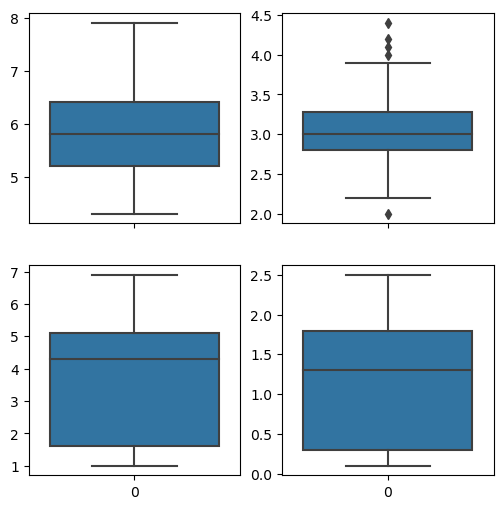

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(6,6))
sns.boxplot(ax=axes[0,0], data=iris['SL'])
sns.boxplot(ax=axes[0,1], data=iris['SW'])
sns.boxplot(ax=axes[1,0], data=iris['PL'])
sns.boxplot(ax=axes[1,1], data=iris['PW'])
plt.show()

The second boxplot, i.e, boxplot of SW has outliers present.

In [10]:
#Removing Outliers
Q1=iris['SW'].quantile(0.25)
Q2=iris['SW'].quantile(0.50)
Q3=iris['SW'].quantile(0.75)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
iris['SW']=np.where(iris['SW']>upp_lim,upp_lim,np.where(iris['SW']<low_lim,low_lim,iris['SW']))

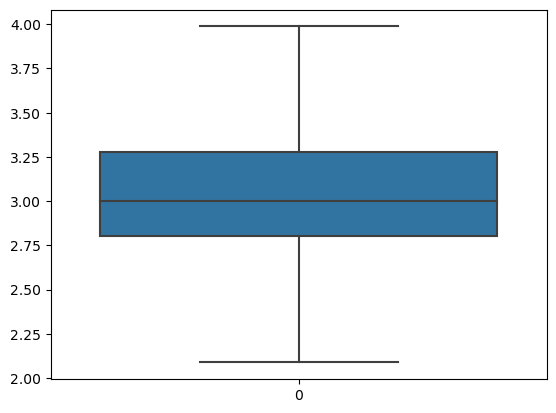

In [11]:
sns.boxplot( data=iris['SW'])
plt.show()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris['Classification']= le.fit_transform(iris['Classification'])
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,4.3,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
x=iris.drop('Classification',axis=1)
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.502851,0.470847,0.457778
std,0.224602,0.214364,0.293015,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.375000,0.101695,0.083333
50%,0.416667,0.480263,0.559322,0.500000
75%,0.583333,0.625000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [14]:
y = iris['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
model=log.fit(x_train,y_train)
pred_lr=model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is:',round(accuracy_score(y_test,pred_lr),4))
print('Precision is:',round(precision_score(y_test,pred_lr,average='micro'),4))
print('recall score is:',round(recall_score(y_test,pred_lr,average='micro'),4))
print('f1 score is:',round(f1_score(y_test,pred_lr,average='micro'),4))

accuracy is: 0.9667
Precision is: 0.9667
recall score is: 0.9667
f1 score is: 0.9667


In [17]:
confusion_matrix(y_test,pred_lr)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

# KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
k_val = np.arange(3,15)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    pred= classifier.predict(x_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

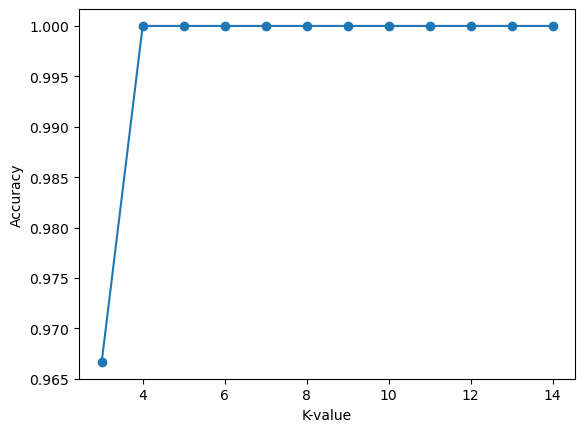

In [19]:
plt.plot(k_val,acc_val,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
pred_knn  = classifier.predict(x_test)

print('accuracy is:',accuracy_score(y_test,pred_knn))
print('Precision is:',precision_score(y_test,pred_knn,average='micro'))
print('recall score is:',recall_score(y_test,pred_knn,average='micro'))
print('f1 score is:',f1_score(y_test,pred_knn,average='micro'))

accuracy is: 1.0
Precision is: 1.0
recall score is: 1.0
f1 score is: 1.0


In [21]:
confusion_matrix(y_test,pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred_dt  = dt_model.predict(x_test)

print('accuracy is:',accuracy_score(y_test,pred_dt))
print('Precision is:',precision_score(y_test,pred_dt,average='micro'))
print('recall score is:',recall_score(y_test,pred_dt,average='micro'))
print('f1 score is:',f1_score(y_test,pred_dt,average='micro'))

accuracy is: 1.0
Precision is: 1.0
recall score is: 1.0
f1 score is: 1.0


In [23]:
confusion_matrix(y_test,pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# SVM Model Classifier

In [24]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred_svm  = svm_linear.predict(x_test)

print('accuracy is:',accuracy_score(y_test,pred_svm ))
print('Precision is:',precision_score(y_test,pred_svm ,average='micro'))
print('recall score is:',recall_score(y_test,pred_svm ,average='micro'))
print('f1 score is:',f1_score(y_test,pred_svm ,average='micro'))

accuracy is: 1.0
Precision is: 1.0
recall score is: 1.0
f1 score is: 1.0


In [25]:
confusion_matrix(y_test,pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print('accuracy is:',accuracy_score(y_test,pred_rf))
print('Precision is:',precision_score(y_test,pred_rf,average='micro'))
print('recall score is:',recall_score(y_test,pred_rf,average='micro'))
print('f1 score is:',f1_score(y_test,pred_rf,average='micro'))

accuracy is: 1.0
Precision is: 1.0
recall score is: 1.0
f1 score is: 1.0


In [27]:
confusion_matrix(y_test,pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])